<a href="https://colab.research.google.com/github/sppu33/DSBDAL/blob/main/dsbdal10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [6]:
print(df['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [7]:
df['Species']=df['Species'].map({'Iris-setosa':'setosa','Iris-versicolor':'versicolor','Iris-virginica':'virginica'})

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [9]:
df.drop(['Id'],inplace=True,axis=1)

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
X=df.drop('Species',axis=1)

In [12]:
y=df['Species']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [19]:
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [20]:
y_pred=model.predict(X_test)

# part 2

In [23]:
# confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]


In [26]:
accuracy=accuracy_score(y_test,y_pred)
errorrate=1-accuracy
precision=precision_score(y_test,y_pred,average="macro")                ###############
recall=recall_score(y_test,y_pred,average="macro")                      ###############

In [28]:
print(f"Accuracy Score:{accuracy:.4f}")
print(f"Error rate:{errorrate:.4f}")
print(f"Precision Score:{precision:.4f}")
print(f"Recall Score:{recall:.4f}")

Accuracy Score:0.9667
Error rate:0.0333
Precision Score:0.9524
Recall Score:0.9697


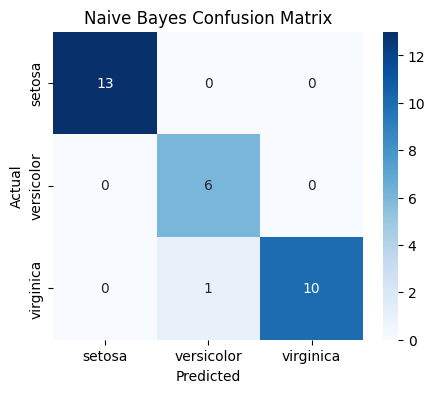

In [29]:
# visualizing confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",xticklabels=model.classes_,yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel('Actual')
plt.title("Naive Bayes Confusion Matrix")
plt.show()

# check this out

example:
cm = [

    [10, 0, 0],
    [1,  8, 1],
    [0,  2, 9]
]

For class setosa (index 0):
TP = cm[0][0] = 10 → Correctly predicted setosa

FP = cm[1][0] + cm[2][0] = 1 + 0 = 1 → Predicted setosa but actually other classes

FN = cm[0][1] + cm[0][2] = 0 + 0 = 0 → Actually setosa but predicted something else

TN = sum(all) - (TP + FP + FN) = 31 - (10 + 1 + 0) = 20

In [30]:
classes = model.classes_

for i, label in enumerate(classes):
    TP = cm[i, i]
    FP = cm[:, i].sum() - TP
    FN = cm[i, :].sum() - TP
    TN = cm.sum() - (TP + FP + FN)

    Accuracy = (TP + TN) / cm.sum()
    Error_rate = 1 - Accuracy
    Precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    Recall = TP / (TP + FN) if (TP + FN) > 0 else 0

    print(f"Class: {label}")
    print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
    print(f"Accuracy: {Accuracy:.4f}")
    print(f"Error Rate: {Error_rate:.4f}")
    print(f"Precision: {Precision:.4f}")
    print(f"Recall: {Recall:.4f}")
    print("-" * 40)

Class: setosa
TP: 13, FP: 0, FN: 0, TN: 17
Accuracy: 1.0000
Error Rate: 0.0000
Precision: 1.0000
Recall: 1.0000
----------------------------------------
Class: versicolor
TP: 6, FP: 1, FN: 0, TN: 23
Accuracy: 0.9667
Error Rate: 0.0333
Precision: 0.8571
Recall: 1.0000
----------------------------------------
Class: virginica
TP: 10, FP: 0, FN: 1, TN: 19
Accuracy: 0.9667
Error Rate: 0.0333
Precision: 1.0000
Recall: 0.9091
----------------------------------------


#Naive Bayes from Scratch

In [32]:
import numpy as np

# get unique classes
uclasses=np.unique(y_train)

# to store mean,var
summaries={}

for cls in uclasses:
  xcls=X_train[y_train==cls]
  summaries[cls]={
      'mean':xcls.mean(axis=0),
      'var':xcls.var(axis=0)+1e-6,
      'prior':xcls.shape[0]/X_train.shape[0]
  }

In [33]:
# Gaussian probability density function
def gaussian(x,mean,var):
  return np.exp(-(x-mean)**2/(2*var))/np.sqrt(2*np.pi*var)

In [34]:
# predictt function
def predictt(x):
  posteriors={}
  for cls in uclasses:
    prior=np.log(summaries[cls]['prior'])
    likelihoods=np.log(gaussian(x,summaries[cls]['mean'],summaries[cls]['var']))
    posteriors[cls]=prior+np.sum(likelihoods)

  return max(posteriors,key=posteriors.get)


In [37]:
# predict on test set
X_test=X_test.values.astype(float)              # need to pass X_test as numeric numpy array
y_pred=np.array([predictt(x) for x in X_test])

In [38]:
cm = confusion_matrix(y_test, y_pred, labels=classes)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[13  0  0]
 [ 0  6  0]
 [ 0  1 10]]
